<a href="https://colab.research.google.com/github/harnalashok/hadoop/blob/main/about_kafka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Last amended: 2rd April, 2023
## Understanding kafka
# Refer: https://engineering.linkedin.com/distributed-systems/log-what-every-software-engineer-should-know-about-real-time-datas-unifying

## Impt points

### HIGH THROUGHPUT
Deliver messages at network limited throughput using a cluster of machines with latencies **as low as 2ms**.

### SCALABLE
Scale production clusters up to a **thousand brokers**, **trillions of messages per day**, petabytes of data, hundreds of thousands of partitions. Elastically expand and contract storage and processing.  

### PERMANENT STORAGE
Store streams of data safely in a distributed, durable, fault-tolerant cluster.  

### HIGH AVAILABILITY
Stretch clusters efficiently over availability zones or connect separate clusters across geographic regions.  



## What all can kafka do?

### BUILT-IN STREAM PROCESSING
Process streams of events with joins, aggregations, filters, transformations, and more, using event-time and exactly-once processing.   

### CONNECT TO ALMOST ANYTHING
Kafka’s out-of-the-box Connect interface integrates with hundreds of event sources and event sinks including Postgres, JMS, Elasticsearch, AWS S3, and more.  

### PROGRAMMING LANGUAGES
Read, write, and process streams of events in a vast array of programming languages.  



## Kafka architecture

Kafka combines three key capabilities so one can implement your use cases for event streaming end-to-end with a single battle-tested solution:

>To publish (write) and subscribe to (read) streams of events, including continuous import/export of your data from other systems. <br>  
> To store streams of events durably and reliably for as long as you want. <br>  
> To process streams of events as they occur or retrospectively.<br>  

Broadly, Kafka accepts streams of events written by data producers.  Kafka stores records chronologically in partitions across brokers (servers); multiple brokers comprise a cluster.  Each record contains information about an event and consists of a key-value pair; timestamp and header are optional additional information.  Kafka groups records into topics; data consumers get their data by subscribing to the topics they want.

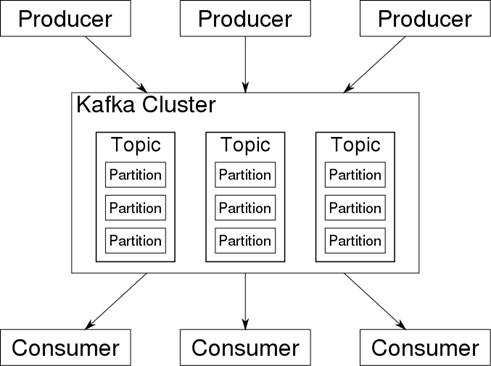

Ref: [here](https://www.upsolver.com/blog/apache-kafka-use-cases-when-to-use-not)

**Events**

An event is a message with data describing the event.  For example, when a new user registers with a website, the system creates a registration event, which may include the user’s name, email, password, location, and so on.
Consumers and Producers

**Producers**  

A producer is anything that creates data.  Producers constantly write events to Kafka. Examples of producers include web servers, other discrete applications (or application components), IoT devices, monitoring agents, and so on.  For instance:

> The website component responsible for user registrations produces a “new user is registered” event.
> A weather sensor (IoT device) produces hourly “weather” events with information about temperature, humidity, wind speed, and so on.

**Consumers**  

Consumers are entities that use data written by producers.  Sometimes an entity can be both a producer and a consumer; it depends on system architecture.  For example, a data warehouse could consume data from Kafka, then process it and produce a prepared subset for rerouting via Kafka to an ML or AI application.  Databases, data lakes, and data analytics applications generally act as data consumers, storing or analyzing the data they receive from Kafka. 

Kafka acts as a middleman between producers and consumers. You can read our previous post to learn more about Kafka and event-driven architecture.
Brokers and Clusters

**Brokers**  

Kafka runs on clusters, although there is now a serverless version of Kafka in preview at AWS.  Each cluster consists of multiple servers, generally called brokers (and sometimes called nodes).

That’s what makes Kafka a distributed system: data in the Kafka cluster is distributed amongst multiple brokers. And multiple copies (replicas) of the same data exist in a Kafka cluster. This mechanism makes Kafka more stable, fault-tolerant, and reliable; if an error or failure occurs with one broker, another broker steps in to perform the functions of the malfunctioning component, and the information is not lost.

**Topics**

A Kafka topic is an immutable log of events (sequences). Producers publish events to Kafka topics; consumers subscribe to topics to access their desired data. Each topic can serve data to many consumers. Continuing with our example, the registration component of the website publishes “new user” events (via Kafka) into the “registration” topic. Subscribers such as analytics apps, newsfeed apps, monitoring apps, databases, and so on in turn consume events from the “registration” topic and use it with other data as the foundation for delivering their own products or services.

Partitions

A partition is the smallest storage unit in Kafka.  Partitions serve to split data across brokers to accelerate performance.  Each Kafka topic is divided into partitions and each partition can be placed on a separate broker.

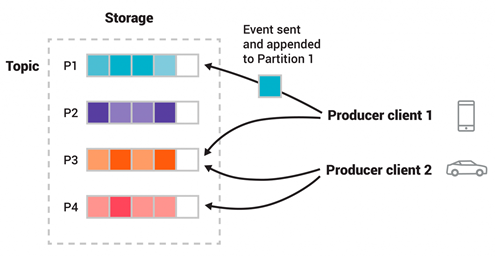

## Kafka use cases

LinkedIn Activity tracking

> This was the original use case for Kafka.  LinkedIn needed to rebuild its user activity tracking pipeline as a set of real-time publish-subscribe feeds.  Activity tracking is often very high volume, as each user page view generates many activity messages (events):
>>user clicks<br>
>>registrations<br>
>>likes<br>
>>time spent on certain pages<br>
>>orders<br>
>>environmental changes<br>

Real-time data processing

Many systems require data to be processed as soon as it becomes available.  Kafka transmits data from producers to consumers with very low latency (5 milliseconds, for instance). This is useful for:

>**Financial organizations**, to gather and process payments and financial transactions in real-time, block fraudulent transactions the instant they’re detected, or update dashboards with up-to-the-second market prices.<br>   
>**Predictive maintenance (IoT)**, in which models constantly analyze streams of metrics from equipment in the field and trigger alarms immediately after detecting deviations that could indicate imminent failure.<br>  
>**To monitor patients** in hospital care and predict changes in condition to ensure timely treatment in emergencies.<br>  
>**Logistical and supply chain businesses**, to monitor and update tracking applications, for example to keep constant tabs on cargo vessels for real-time cargo delivery estimates.<br>   
> **Data integration**: To connect, store, and make available data produced by different divisions of a company. 


Operational Metrics/KPIs

Kafka is often used for operational monitoring data. This involves aggregating statistics from distributed applications to produce centralized feeds of operational data.

Log Aggregation

Many organizations use Kafka to aggregate logs.  Log aggregation typically involves collecting physical log files off servers and placing them in a central repository (such as a file server or data lake) for processing. Kafka filters out the file details and abstracts the data as a stream of messages. This enables lower-latency processing and easier support for multiple data sources and distributed data consumption. Compared with log-centric systems like Scribe or Flume, Kafka offers equally good performance, stronger durability guarantees due to replication, and much lower end-to-end latency.

## Understanding kafka topics and partitions
See StackOverflow [here](https://stackoverflow.com/a/51829144/3282777)

An overview of producer components:

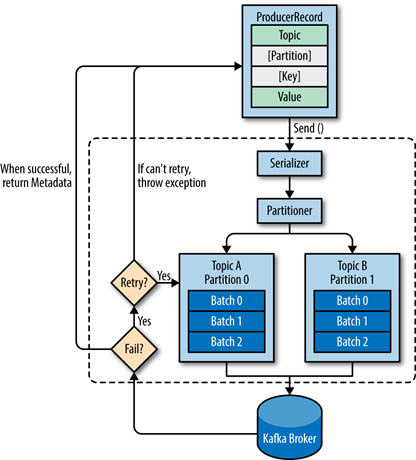

Question: When a producer is producing a message, it will specify the topic it wants to send the message to. Is that right? Does it care about partitions?

Answer: The producer will decide target partition to place any message, depending on:

>a. Partition id, if it's specified within the message  
>b. key % (num partitions), ie *key modulo noOfPartitions*, or hash, if no partition id is mentioned  
>c. Round robin if neither partition id nor message key is available in the message means only the value is available


Question: When a subscriber is running - Does it specify its group id so that it can be part of a cluster of consumers of the same topic or several topics that this group of consumers is interested in?  
Question: Does each consumer group have a corresponding partition on the broker or does each consumer have one?


Answer: You should always configure group.id .  
Consider a consumer group as different threads of the same consumer, accessing partitions parallely so as to read messages faster. Therefore, In one consumer group, each partition will be processed by one consumer only. These are the possible scenarios.  
If the number of consumers is less than the number of topic partitions, then multiple partitions can be assigned to one of the consumers in the group

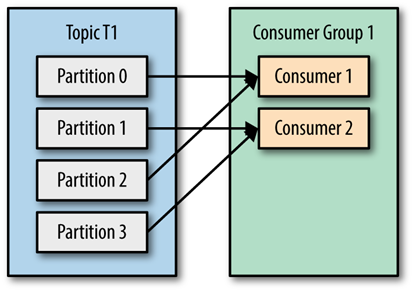

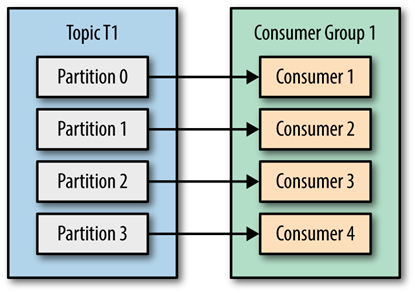

If the number of consumers is higher than the number of topic partitions, then partition and consumer mapping can be as seen below, Not effective, check Consumer 5

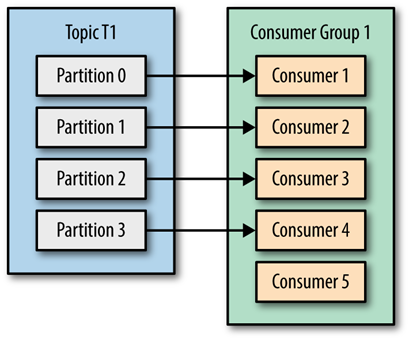

## Question: Why kafka is fast?  
See answer [here](https://twitter.com/alexxubyte/status/1506663791961919488?lang=en)


Kafka achieves low latency message delivery through Sequential I/O and Zero Copy Principle. The same techniques are commonly used in many other messaging/streaming platforms.  
One of the main reasons for delay is ' disk seek time'. IF a message or series of messages are fragmented, then disk seek time consumes a lot of time. Kafka avoids seektime by Sequential I/O. All writes are append only and all reads start from an offset in a sequential fashion.   
Also kafka follows a zero-copy policy while sending messages. See diagram below.  

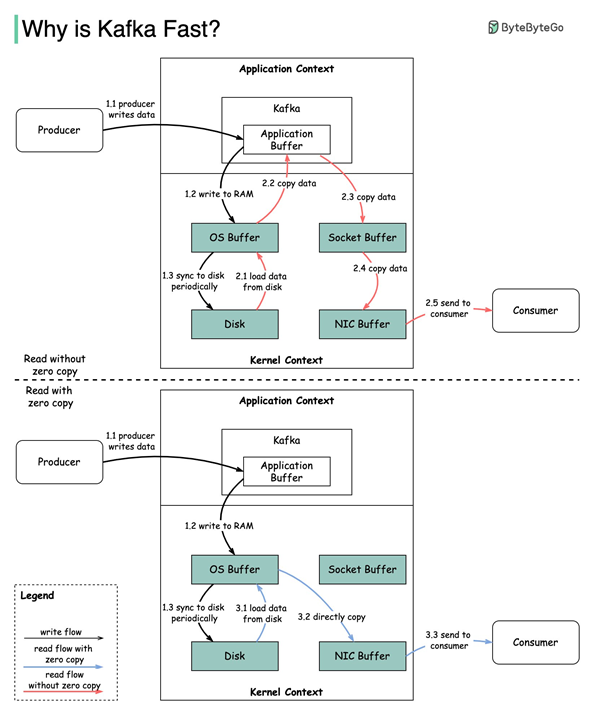

## Kafka for data integration
See [here](https://engineering.linkedin.com/distributed-systems/log-what-every-software-engineer-should-know-about-real-time-datas-unifying)

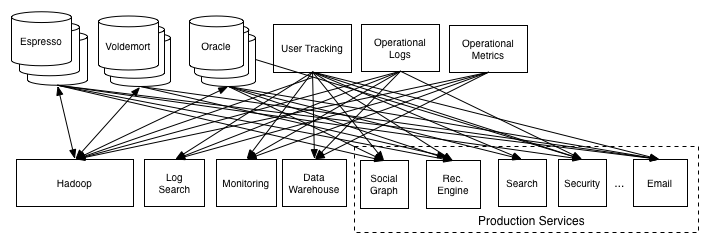

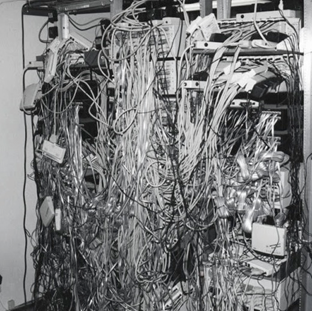

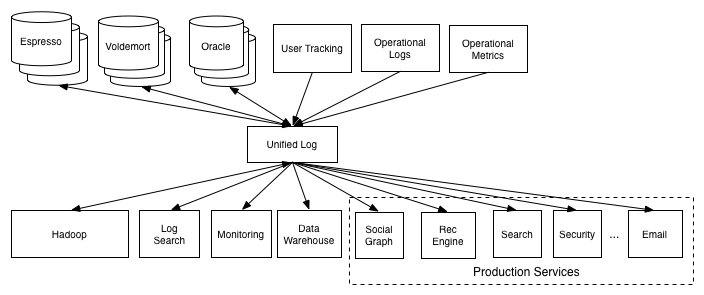